# Author: Meghma Chakraborty

# <font color=green><u>Task #1: Prediction using supervised machine learning.</u> </font>

# GRIP@ The Sparks Foundation

## <font color=blue> Motivation:Percentage prediction of a student based on the number of study hours.


## <font color=blue>This is a simple linear regression task as it involves just two variables.</font>

## Step 1:- Importing required libraries

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2:- Reading in the dataset from source

In [2]:
#reading in the data from source
dataset=pd.read_csv("http://bit.ly/w-data")
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 3:- Discovering and Visualizing the data along with some statistical properties

In [3]:
#Discover and visualize the data to gain insights
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#finding statistical properties of the data
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#finding number of rows and columns in the data
dataset.shape

(25, 2)

In [6]:
#checking the existence of missing or null values
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Step 4:- Printing the Scatter plot to analyze the relationship between the variables

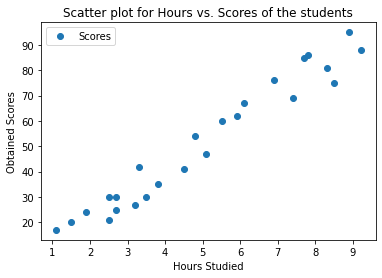

In [7]:
#Scatter diagram for hours vs. scores of students
dataset.plot(x="Hours",y="Scores",style="o")
plt.xlabel("Hours Studied")
plt.ylabel("Obtained Scores")
plt.title("Scatter plot for Hours vs. Scores of the students")
plt.show()

## Step 5:- Preprocessing the data 

In [8]:
#reshaping the data dividing it into attributes and labels
x=dataset.iloc[:,:-1]
x.head(10)

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [9]:
y=dataset.iloc[:,1]
y.head(10)

0    21
1    47
2    27
3    75
4    30
5    20
6    88
7    60
8    81
9    25
Name: Scores, dtype: int64

## Step 6:- Splitting the data into Training and Testing datasets 

In [10]:
#Splitting the data into training and testing sets and training the algorithm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#test size=0.2 means 20 percent of the data is used for testing

## Step 7:- Fitting a Linear Regression Line to the Training dataset 

In [11]:
#Plotting the regression line
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_train)

## Step 8:- Finding the Equation of the Regression Line 

In [12]:
#Equation of regression line
print(model.intercept_)
print(model.coef_)
lr_regression=model.coef_*x_train+model.intercept_
print("The equation of the fitted regression line is:")
print("Score=",model.coef_,"Hours=",model.intercept_)

2.018160041434683
[9.91065648]
The equation of the fitted regression line is:
Score= [9.91065648] Hours= 2.018160041434683


## Step 9:- Plotting the Regression Line along with the data points 

Text(0.5, 1.0, 'Plot of fitted regression line for the given data')

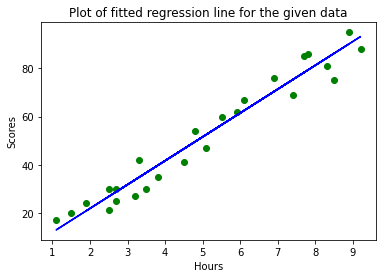

In [13]:
#Plotting the regression line
plt.plot(x,y,"o",color="g")
plt.plot(x_train,lr_regression,color="b")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Plot of fitted regression line for the given data")

## Step 10:- Predicting the Scores based on the Testing dataset 

In [14]:
#Prediction of scores based on testing dataset
y_pred=model.predict(x_test)
print("The predicted scores based on the testing dataset is: ",y_pred)

The predicted scores based on the testing dataset is:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
#checking the accuracy of the model
model.score(x_test,y_test) 

0.9454906892105356

The accuracy of the model is 94.5%.

In [16]:
#a prediction of score based on 5 hours of study
model.predict([[5]])

array([51.57144244])

## Step 11:- Comparing the Actual and the Predicted Scores 

In [17]:
#Comparing actual and predicted scores of students
df=pd.DataFrame({"Actual": y_test,"Predicted": y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Step 12:- Comparing the Actual and the Predicted Scores using a Bar Diagram 

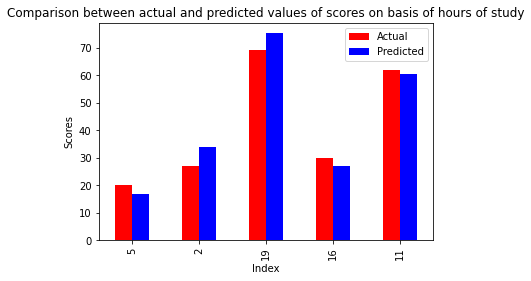

In [18]:
#Bar diagram showing actual and predicted scores of students
df.plot(kind="bar",color=("r","b"))
plt.xlabel("Index")
plt.ylabel("Scores")
plt.title("Comparison between actual and predicted values of scores on basis of hours of study")
plt.show()

## Step 13:- Evaluating the model for goodness of fit 

In [21]:
#Evaluating the model peformance and predicting it's accuracy
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R-2:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


<b>In a model, the R-Squared value of the testing dataset gives the Goodness of Fit. In our model, the testing dataset has a R-Squared value of 94.5%,which is great. So,94.5% of the observed variation in Percentage score of the student can be explained by the number of  hours of study.</b>

## Step 14:- Predicting the Percentage Score of a student who studies for 9.25 hours a day

In [22]:
#Prediction of percentage score of a student who studies for 9.25 hours per day
print("The expected percentage score of a student who studies 9.25 hours per day is:",model.predict([[9.25]]))

The expected percentage score of a student who studies 9.25 hours per day is: [93.69173249]


## Conclusion 

<b>In this task, we have fitted a suitable linear regression model involving two variables for the Goodness of Fit.We have found that our model explains 94.5% of the variation in scores of the student(dependent variable) based on number of hours of study(independent variable).</b>

<b> We conclude from the fitted model that a student studying for 9.25 hours per day is expected to score 93.69%.

# Thank You.